## KOSPI

### 세팅

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.rc('font', family='NanumBarunGothic') 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [89]:
# KOSPI 데이터 불러오기 
kospi = pd.read_csv('/content/drive/MyDrive/DSL/kospi_data.csv')

In [90]:
#종가를 뒤로 1일 미룬 Close_lag 칼럼 생성
kospi['Close_lag'] = kospi['Close'].shift(1)

#로그수익률 칼럼 생성
kospi['Log_Rate'] = np.log(kospi['Close']/kospi['Close_lag'])
kospi

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667
...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857


In [91]:
kospi['Date'] = pd.to_datetime(kospi['Date'])

kospi['Month'] = [x.month for x in kospi['Date']]
kospi['Day'] = [x.day for x in kospi['Date']]
kospi['Year'] = [x.year for x in kospi['Date']]

df = pd.DataFrame({'Year':kospi['Year'], 
									'Month':kospi['Month']}).drop_duplicates(['Year', 'Month'])

rate = kospi.groupby(['Year', 'Month'])['Log_Rate'].sum()

### one sample t-test

In [92]:
rate = kospi.groupby(['Year', 'Month'])['Log_Rate'].sum()
change = rate.reset_index()
july_log_rate = change[change['Month'] == 7]['Log_Rate']
aug_log_rate = change[change['Month'] == 8]['Log_Rate']

print(np.mean(july_log_rate))
print(np.mean(aug_log_rate))

0.019596279503788255
-0.01501265078519986


In [17]:
t_stat, p_value = stats.ttest_1samp(july_log_rate, np.mean(july_log_rate))
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 0.0, p-value : 1.0


In [18]:
t_stat, p_value = stats.ttest_1samp(aug_log_rate, np.mean(aug_log_rate))
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 0.0, p-value : 1.0


-> p-value > 0.05이므로 귀무가설을 기각할 수 없다. 
따라서 7월은 평균이 약 0.0196, 8월은 약 -0.015라고 말할 수 있다. 



###two sample t-test

t-statistics : 0.21753986955901117, p-value : 0.8283346987874091
t-statistics : 1.7504871977767493, p-value : 0.08382068161610985
t-statistics : 0.22501991772935442, p-value : 0.8225304967780607
t-statistics : 0.6078026095847519, p-value : 0.5450187776830915
t-statistics : 1.3248820601118154, p-value : 0.18889051407659668
t-statistics : 1.4718171517542864, p-value : 0.14489790404741618
t-statistics : 0.0, p-value : 1.0
t-statistics : 2.6368423374961876, p-value : 0.010007627944567983
t-statistics : 1.7292717574733922, p-value : 0.08756991217705065
t-statistics : 1.1096237047384865, p-value : 0.2704446845576739
t-statistics : -0.163233445184716, p-value : 0.8707412130676576
t-statistics : 0.09265655178414503, p-value : 0.9264052038434277


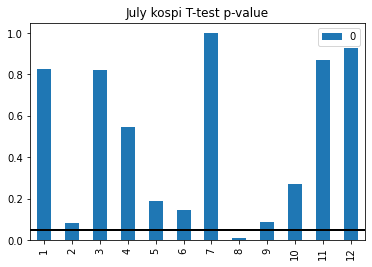

In [93]:
## 7월 ''월별'' 수익률 T-test

lst = []
for i in range(1, 13): 
  t_stat, p_value = stats.ttest_ind(july_log_rate, change[change['Month'] == i]['Log_Rate'], equal_var=True, alternative="two-sided")
  lst.append(p_value)
  print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

lst = pd.DataFrame(lst)
lst.index = lst.index + 1
lst.plot(kind='bar', title = 'July kospi T-test p-value')
plt.axhline(0.05, color='black', lw=2)

**7월**

- 8월 
  - 7월과 8월의 월 평균 변화율의 차이는 유의미하다. p-value < 0.05이므로 귀무가설 기각 가능. 
- 그 외 
  - 그러나 다른 월과는 p-value > 0.05이므로 평균의 차이가 유의미하다고 할 수 없다. 

=> 7월, 8월의 평균 차이만이 확실한 결과 차이를 낳고 있다. 이유가 분명 존재할 것 

t-statistics : -1.7864412596582446, p-value : 0.07776961755827873
t-statistics : -0.9356542211222497, p-value : 0.35223243941493154
t-statistics : -2.3417544627459135, p-value : 0.02165014571529974
t-statistics : -1.6914891762858206, p-value : 0.09458761926107126
t-statistics : -1.0973759156999294, p-value : 0.275689161344285
t-statistics : -0.9623064031773282, p-value : 0.3387249139667112
t-statistics : -2.6368423374961876, p-value : 0.010007627944567983
t-statistics : 0.0, p-value : 1.0
t-statistics : -0.8132534851258963, p-value : 0.418456834429767
t-statistics : -0.7607828603290056, p-value : 0.44899583029414236
t-statistics : -2.7268455299718104, p-value : 0.007836403546791408
t-statistics : -2.634457754493404, p-value : 0.010093628828300342


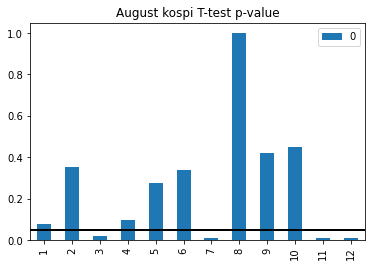

In [94]:
## 8월 ''월별'' 수익률 T-test

lst = []
for i in range(1, 13): 
  t_stat, p_value = stats.ttest_ind(aug_log_rate, change[change['Month'] == i]['Log_Rate'], equal_var=True, alternative="two-sided")
  lst.append(p_value)
  print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

lst = pd.DataFrame(lst)
lst.index = lst.index + 1
lst.plot(kind='bar', title = 'August kospi T-test p-value')
plt.axhline(0.05, color='black', lw=2)

**8월** 
- 월별:    7, 11, 12월 과의 차이가 유의미하다. 
- 일별: 3, 7, 11, 12월과의 차이가 유의미하다. 

#### 일별 수익률 T-test


In [78]:
## 7월 ''일별'' 수익률 T-test

july = kospi[kospi['Month' ]== 7]['Log_Rate']
aug = kospi[kospi['Month' ]== 8]['Log_Rate']

for i in range(1, 13): 
  t_stat, p_value = stats.ttest_ind(july, kospi[kospi['Month'] == i]['Log_Rate'], equal_var=True, alternative="two-sided")
  print(i)
  print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

1
t-statistics : 0.29672378174160663, p-value : 0.7667115759937959
2
t-statistics : 1.0543113534575557, p-value : 0.2918872736507664
3
t-statistics : 0.31402502246333236, p-value : 0.7535374397646276
4
t-statistics : -0.5372746719221458, p-value : 0.5911444172978506
5
t-statistics : 0.31954052947423683, p-value : 0.7493534374908206
6
t-statistics : 1.1327716300327448, p-value : 0.25745872211565696
7
t-statistics : 0.0, p-value : 1.0
8
t-statistics : 1.1389148329207095, p-value : 0.25488541780215396
9
t-statistics : 2.0728228887669466, p-value : 0.038332054017970005
10
t-statistics : 0.02603865722631086, p-value : 0.979229302609312
11
t-statistics : -0.6707412372694126, p-value : 0.5024721629583254
12
t-statistics : nan, p-value : nan


In [76]:
## 8월 ''일별'' 수익률 T-test

for i in range(1, 13): 
  t_stat, p_value = stats.ttest_ind(aug, kospi[kospi['Month'] == i]['Log_Rate'], equal_var=True, alternative="two-sided")
  print(i)
  print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

1
t-statistics : -0.7870509622924127, p-value : 0.43135317525584826
2
t-statistics : -0.09268136874465098, p-value : 0.926167157942112
3
t-statistics : -0.6384992615765362, p-value : 0.5232260534710973
4
t-statistics : -1.5722960574178844, p-value : 0.1160540199657434
5
t-statistics : -0.8298086505759547, p-value : 0.40675369467851463
6
t-statistics : -0.08290068523980071, p-value : 0.9339393864948221
7
t-statistics : -1.1389148329207095, p-value : 0.25488541780215396
8
t-statistics : 0.0, p-value : 1.0
9
t-statistics : 0.9354562043973449, p-value : 0.3496770040520013
10
t-statistics : -0.8193994785366508, p-value : 0.41266140948925467
11
t-statistics : -1.6502245644599798, p-value : 0.09906899447020306
12
t-statistics : nan, p-value : nan


### **결론**

- 7월에 오른다 -> 기각 (6,7월 p-value > 0.05) 
- 8월에 내린다 -> 기각 불가 (7,8월 p-value < 0.05)


- 7월의 수익률이 다른 모든 달보다 유의미하게 낮다 -> 기각 불가
  - 7월의 수익률이 8월 보다 낮다 -> 기각
- 8월의 수익률이 다른 모든 달보다 유의미하게 높다 -> 기각 불가
  - 8월의 수익률이 7, 11, 12월보다 높다 -> 기각

  


## S&P 500

### 세팅


In [109]:
SP = pd.read_csv('/content/drive/MyDrive/DSL/S&P_data.csv')

In [110]:
#날짜Date 칼럼을 datetime 타입으로 바꾸기
SP['Date'] = pd.to_datetime(SP['Date'])
#Date에서 월과 년만 분리해서 변수 만들기
SP['Month'] = [x.month for x in SP['Date']]
SP['Day'] = [x.day for x in SP['Date']]
SP['Year'] = [x.year for x in SP['Date']]

#각 연도와 월에 해당하는 월간수익률을 계산하기 위해 새로운 데이터프레임을 만듭니다
df = pd.DataFrame({'Year':SP['Year'], 
									'Month':SP['Month']}).drop_duplicates(['Year', 'Month'])
#각 연도와 월에 해당하는 로그수익률들만 모아서 합해주면 월간수익률이 얻어집니다.
rate_SP = SP.groupby(['Year', 'Month'])['Log_Rate'].sum()

### one sample T-test

In [103]:
kospi = SP

In [105]:
rate = kospi.groupby(['Year', 'Month'])['Log_Rate'].sum()
change = rate.reset_index()
july_log_rate = change[change['Month'] == 7]['Log_Rate']
aug_log_rate = change[change['Month'] == 8]['Log_Rate']
sep_log_rate = change[change['Month'] == 9]['Log_Rate']
oct_log_rate = change[change['Month'] == 10]['Log_Rate']

print(np.mean(july_log_rate))
print(np.mean(aug_log_rate))
print(np.mean(sep_log_rate))
print(np.mean(oct_log_rate))

0.011285173842094933
-0.0001282472316965585
-0.010178410147081865
0.011411825730453285


In [99]:
t_stat, p_value = stats.ttest_1samp(sep_log_rate, np.mean(sep_log_rate))
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 0.0, p-value : 1.0


In [100]:
t_stat, p_value = stats.ttest_1samp(oct_log_rate, np.mean(oct_log_rate))
print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

t-statistics : 0.0, p-value : 1.0


### two sample T-test

1 : t-statistics : -1.8394846436960224, p-value : 0.06933504108359928
2 : t-statistics : -1.141081324824362, p-value : 0.2570788099086528
3 : t-statistics : -1.8487994815301751, p-value : 0.06800490501582464
4 : t-statistics : -2.829378476092086, p-value : 0.005831943631400136
5 : t-statistics : -2.0380186622664476, p-value : 0.044694409699604754
6 : t-statistics : -1.2217329474396443, p-value : 0.22522622663157219
7 : t-statistics : -2.294138655257301, p-value : 0.024278455406392434
8 : t-statistics : -0.956306934037954, p-value : 0.3416613832159683
9 : t-statistics : 0.0, p-value : 1.0
10 : t-statistics : -1.7862965466068252, p-value : 0.07765949978971529
11 : t-statistics : -2.863644190935973, p-value : 0.005287507729314456
12 : t-statistics : -2.383715874603461, p-value : 0.01936601652418123


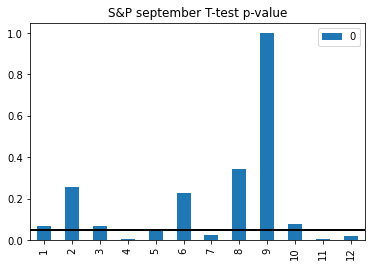

In [111]:
### 9월 '' 월별 '' 수익률 T-test 

lst = []
for i in range(1, 13): 
  t_stat, p_value = stats.ttest_ind(sep_log_rate, change[change['Month'] == i]['Log_Rate'], equal_var=True, alternative="two-sided")
  lst.append(p_value)
  print(i, ':', "t-statistics : {}, p-value : {}".format(t_stat, p_value))

lst = pd.DataFrame(lst)
lst.index = lst.index + 1
lst.plot(kind='bar', title = 'S&P september T-test p-value')
plt.axhline(0.05, color='black', lw=2)


- 

1
t-statistics : 0.28912720183747903, p-value : 0.7731880410388956
2
t-statistics : 0.9092983383075036, p-value : 0.36579432696487646
3
t-statistics : 0.29761009322165144, p-value : 0.7667355735309622
4
t-statistics : -0.4238357857989436, p-value : 0.6727689562087704
5
t-statistics : 0.2814387309377359, p-value : 0.7790660552469231
6
t-statistics : 0.9607351974180699, p-value : 0.3394427005438877
7
t-statistics : 0.011028334910690553, p-value : 0.9912269907531827
8
t-statistics : 0.9275129951403243, p-value : 0.3563176808770496
9
t-statistics : 1.7862965466068252, p-value : 0.07765949978971529
10
t-statistics : 0.0, p-value : 1.0
11
t-statistics : -0.5352095428115696, p-value : 0.5939190702727106
12
t-statistics : 0.028011582127415485, p-value : 0.9777185764904723


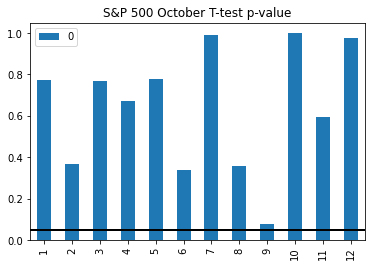

In [112]:
## 10월 ''월별'' 수익률 T-test

lst= []
for i in range(1, 13): 
  t_stat, p_value = stats.ttest_ind(oct_log_rate, change[change['Month'] == i]['Log_Rate'], equal_var=True, alternative="two-sided")
  lst.append(p_value)
  print(i)
  print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

lst = pd.DataFrame(lst)
lst.index = lst.index + 1
lst.plot(kind='bar', title = 'S&P 500 October T-test p-value')
plt.axhline(0.05, color='black', lw=2)

In [41]:
## 9월 ''일별'' 수익률 T-test 

sep = kospi[kospi['Month' ]== 9]['Log_Rate']
oct = kospi[kospi['Month' ]== 10]['Log_Rate']

for i in range(1, 13): 
  t_stat, p_value = stats.ttest_ind(sep, kospi[kospi['Month'] == i]['Log_Rate'], equal_var=True, alternative="two-sided")
  print(i)
  print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

1
t-statistics : -1.676649793007429, p-value : 0.09378766943875895
2
t-statistics : -1.0219655703451207, p-value : 0.3069426013042919
3
t-statistics : -1.4296851493994136, p-value : 0.15297941103375917
4
t-statistics : -2.4257703061338916, p-value : 0.015375720975898831
5
t-statistics : -1.7690058587298378, p-value : 0.07706401870496503
6
t-statistics : -1.0670719531550776, p-value : 0.2860829189069125
7
t-statistics : -2.0728228887669466, p-value : 0.038332054017970005
8
t-statistics : -0.9354562043973449, p-value : 0.3496770040520013
9
t-statistics : 0.0, p-value : 1.0
10
t-statistics : -1.520748879108375, p-value : 0.128496285383864
11
t-statistics : -2.4563739431186185, p-value : 0.01413117565411193
12
t-statistics : nan, p-value : nan


In [43]:
## 10월 ''일별'' 수익률 T-test

for i in range(1, 13): 
  t_stat, p_value = stats.ttest_ind(oct, kospi[kospi['Month'] == i]['Log_Rate'], equal_var=True, alternative="two-sided")
  print(i)
  print("t-statistics : {}, p-value : {}".format(t_stat, p_value))

1
t-statistics : 0.1922926978181403, p-value : 0.8475341343843171
2
t-statistics : 0.725738231194457, p-value : 0.4680950422384328
3
t-statistics : 0.2251335513377516, p-value : 0.8218997321419558
4
t-statistics : -0.41687152022000123, p-value : 0.6768211192689844
5
t-statistics : 0.2012708632998996, p-value : 0.8405088626334194
6
t-statistics : 0.778790220989534, p-value : 0.436201993005662
7
t-statistics : -0.02603865722631086, p-value : 0.979229302609312
8
t-statistics : 0.8193994785366508, p-value : 0.41266140948925467
9
t-statistics : 1.520748879108375, p-value : 0.128496285383864
10
t-statistics : 0.0, p-value : 1.0
11
t-statistics : -0.5254449795416745, p-value : 0.5993377588496449
12
t-statistics : nan, p-value : nan
